In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_excel('sample_data/221129_A_RoomSchedule.xlsx',sheet_name='ARK_Room Schedule')
df.head()

,Element ID,Name,Number,Level,Base Offset,Department,Dyn_RoomParam_Services,Dyn_Location,X Value,Y Value,Z value,Area,Volume,Room_Visibility
0,50420111,ER,2113,02,0.0,Plant,NaN,"Point(X = 216974.415, Y = 46959.399, Z = 24985...",216974.415,46959.399,249850.0,0,0.86,BOH
1,50420610,RISER ACCESS,28,GF,0.0,Plant,NaN,"Point(X = 37449.932, Y = 46314.228, Z = 241100...",37449.932,46314.228,241100.0,0,0.00,BOH
2,50420690,JANITOR,7246,B2,150.0,Toilets and Personal Care,NaN,"Point(X = 101346.123, Y = 70816.177, Z = 22770...",101346.123,70816.177,227700.0,0,1.21,BOH
3,50420809,ER,3179,03,0.0,Plant,NaN,"Point(X = 217069.726, Y = 46789.768, Z = 25422...",217069.726,46789.768,254225.0,0,0.59,NaN
4,50420810,ER,2508,A2,0.0,Plant,NaN,"Point(X = 217305.544, Y = 46891.000, Z = 25275...",217305.544,46891.000,252750.0,0,1.17,NaN


In [ ]:
df.shape

(1666, 14)

In [ ]:
df.isnull().sum()

Element ID                   0
Name                         0
Number                       0
Level                        0
Base Offset                  0
Department                   0
Dyn_RoomParam_Services    1153
Dyn_Location                20
X Value                     20
Y Value                     20
Z value                     20
Area                         0
Volume                      24
Room_Visibility            144
dtype: int64

In [ ]:
#df=df.drop(['Unnamed: 16','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21'],axis=1)
df = df.dropna(subset=['Dyn_Location'])
df = df.dropna(subset=['Volume'])

df["Room_Visibility"].fillna("BOH", inplace = True)
print(df.isnull().sum())
df.shape


Element ID                   0
Name                         0
Number                       0
Level                        0
Base Offset                  0
Department                   0
Dyn_RoomParam_Services    1132
Dyn_Location                 0
X Value                      0
Y Value                      0
Z value                      0
Area                         0
Volume                       0
Room_Visibility              0
dtype: int64


(1642, 14)

In [ ]:
df.Department.unique()

array(['Plant', 'Toilets and Personal Care', 'BoH', 'Art Storage',
       'Circulation', 'Parking', 'Auditoria', 'Research & Education',
       'Office', 'Commercial', 'External',
       'Circulation & Permanent Galleries', 'Galleries'], dtype=object)

In [ ]:
df.Area.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71,
       72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 89, 90, 92,
       97, 99, 100, 101, 102, 104, 105, 106, 107, 109, 110, 111, 112, 113,
       114, 115, 117, 119, 121, 123, 124, 127, 131, 137, 138, 140, 141,
       145, 146, 149, 154, 156, 157, 158, 160, 168, 173, 174, 176, 185,
       191, 197, 202, 205, 206, 208, 212, 213, 219, 224, 226, 227, 228,
       231, 233, 234, 236, 237, 242, 246, 248, 251, 261, 265, 274, 276,
       288, 296, 298, 316, 318, 320, 324, 326, 332, 349, 350, 355, 360,
       372, 376, 381, 390, 410, 454, 457, 459, 461, 480, 489, 511, 563,
       566, 571, 588, 593, 645, 656, 673, 681, 686, 688, 690, 697, 717,
       742, 768, 773, 849, 855, 900, 923, 963, 9

In [ ]:
#dfaqa=df[df['Level']=='02']
#dfaqa

In [ ]:
df=df[(df['Area']!='Not')]

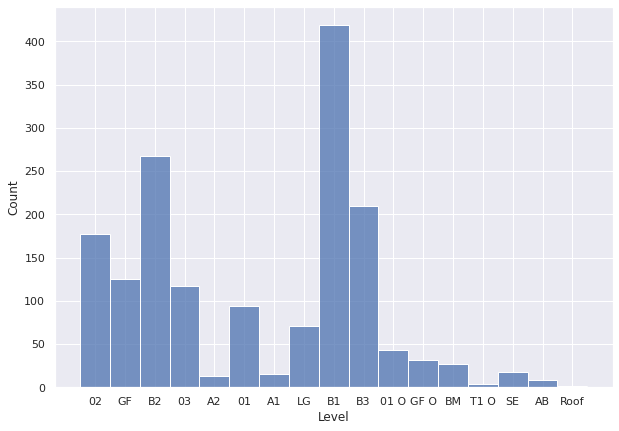

In [ ]:
plt_1 = plt.figure(figsize=(10, 7))
sns.set_theme(style="darkgrid")
sns.histplot(x='Level', data=df)
plt.show()

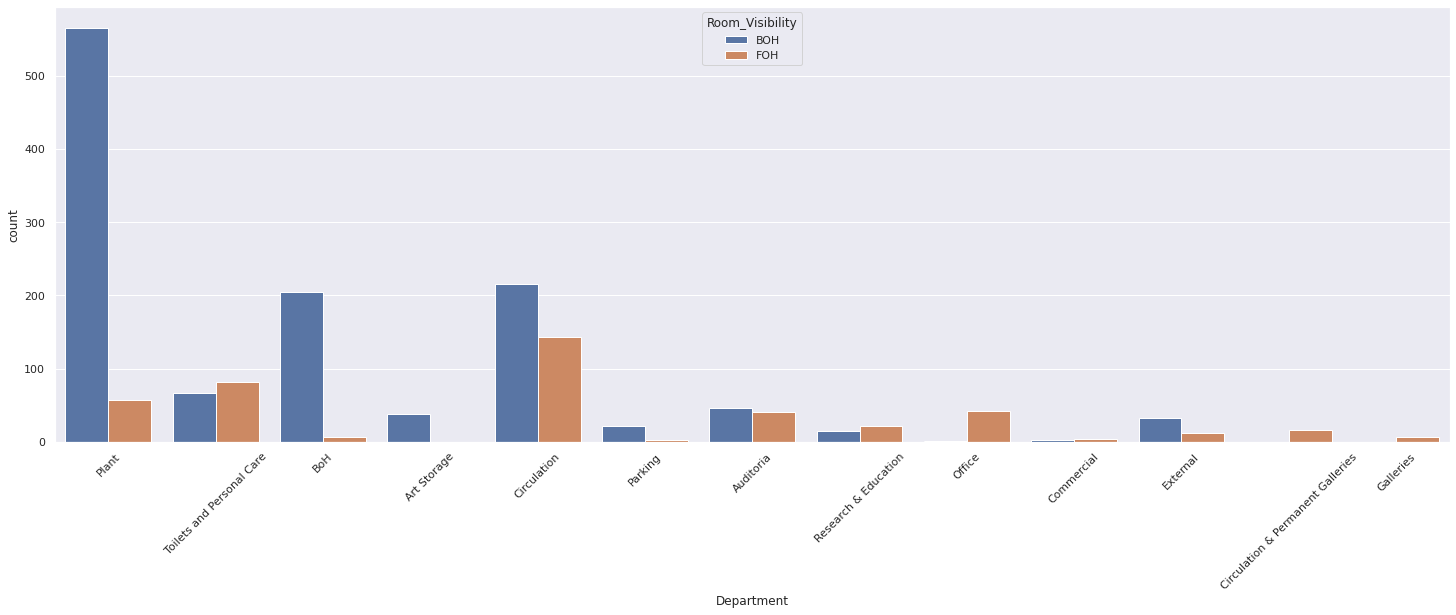

In [ ]:
plt.figure(figsize=(25,8))
ax=sns.countplot(x=df["Department"],hue='Room_Visibility',data=df)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
df.Department.unique()

array(['Plant', 'Toilets and Personal Care', 'BoH', 'Art Storage',
       'Circulation', 'Parking', 'Auditoria', 'Research & Education',
       'Office', 'Commercial', 'External',
       'Circulation & Permanent Galleries', 'Galleries'], dtype=object)

In [ ]:
df['Department'].replace(['Plant', 'Toilets and Personal Care', 'BoH', 'Art Storage',
       'Circulation', 'Parking', 'Auditoria', 'Research & Education',
       'Office', 'Commercial', 'External',
       'Circulation & Permanent Galleries', 'Galleries'],[0,1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
df['Room_Visibility'].replace(['FOH', 'BOH'],[0, 1], inplace=True)
df['Level'].replace(['GF', '02 ','B1','Roof','01','03','B2','SE','LG','AB','B3','A2','A1','BM','GF O','01 O','T1 O'],[0, 8,-6,17,4,13,-13,-1,-3,2,-17,11,6,-9,-1,5,1], inplace=True)


In [ ]:
df['Area'] = df['Area'].apply(pd.to_numeric)
df['Level'] = df['Level'].apply(pd.to_numeric)
df['Room_Visibility'] = df['Room_Visibility'].apply(pd.to_numeric)
df['Department'] = df['Department'].apply(pd.to_numeric)

df_num=df.select_dtypes(include=np.number)
df_num=df_num[(df_num['Level']==2)]
df_num

,Element ID,Number,Level,Base Offset,Department,X Value,Y Value,Z value,Area,Volume,Room_Visibility
0,50420111,2113,2,0.0,0,216974.415,46959.399,249850.0,0,0.86,1
1,50420610,28,0,0.0,0,37449.932,46314.228,241100.0,0,0.00,1
2,50420690,7246,-13,150.0,1,101346.123,70816.177,227700.0,0,1.21,1
3,50420809,3179,13,0.0,0,217069.726,46789.768,254225.0,0,0.59,1
4,50420810,2508,11,0.0,0,217305.544,46891.000,252750.0,0,1.17,1
...,...,...,...,...,...,...,...,...,...,...,...
1637,50690184,2250,2,0.0,11,166882.044,78085.379,249850.0,1154,5049.05,0
1638,50421077,6412,-6,0.0,11,174181.061,76362.180,234600.0,1183,3550.46,0
1639,50419776,79,0,0.0,11,166828.517,76236.824,241100.0,1266,5537.10,0
1640,50421032,7275,-13,0.0,5,157781.783,61519.031,227700.0,8149,52561.15,1


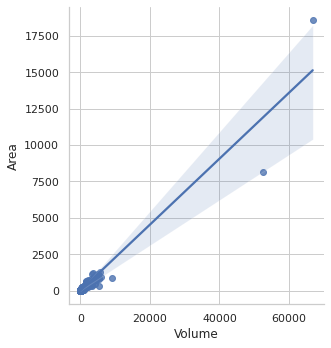

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='Volume', y ='Area', data = df_num)

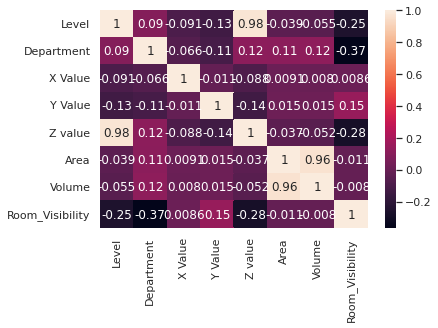

In [ ]:
df_numx=df_num.drop(['Element ID','Number','Base Offset'],axis=1)
#df_ar=df_num[['Area','Volume']]
sns.heatmap(df_numx.corr(), annot=True)

In [ ]:
df_numx=df_numx.drop(['Volume'],axis=1)

In [ ]:
# copy the data
df_min_max_scaled = df_numx.copy()
  
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

df_min_max_scaled

,Level,Department,X Value,Y Value,Z value,Area,Room_Visibility
0,0.558824,0.000000,0.807768,0.338206,0.749284,0.000000,1.0
1,0.500000,0.000000,0.113231,0.333445,0.498567,0.000000,1.0
2,0.117647,0.083333,0.360430,0.514244,0.114613,0.000000,1.0
3,0.882353,0.000000,0.808137,0.336954,0.874642,0.000000,1.0
4,0.823529,0.000000,0.809049,0.337701,0.832378,0.000000,1.0
...,...,...,...,...,...,...,...
1637,0.558824,0.916667,0.613973,0.567883,0.749284,0.062183,0.0
1638,0.323529,0.916667,0.642211,0.555168,0.312321,0.063746,0.0
1639,0.500000,0.916667,0.613766,0.554243,0.498567,0.068219,0.0
1640,0.117647,0.416667,0.578766,0.445641,0.114613,0.439110,1.0


In [ ]:
df_numx=df_numx.reset_index(drop=True)
df_numx.head(64)

,Level,Department,X Value,Y Value,Z value,Area,Room_Visibility
0,2,0,216974.415,46959.399,249850.0,0,1
1,0,0,37449.932,46314.228,241100.0,0,1
2,-13,1,101346.123,70816.177,227700.0,0,1
3,13,0,217069.726,46789.768,254225.0,0,1
4,11,0,217305.544,46891.000,252750.0,0,1
...,...,...,...,...,...,...,...
59,-17,0,146912.085,76170.651,223700.0,1,1
60,-17,0,162897.085,19955.651,223700.0,1,1
61,-17,0,139303.673,105977.494,223700.0,1,1
62,-17,0,31062.700,34455.920,223700.0,1,1


In [ ]:
#df_min_max_scaled['Number']=df_num['Number'].astype(int)
#df_min_max_scaled

In [ ]:
df_numx

,Level,Department,X Value,Y Value,Z value,Area,Room_Visibility
0,2,0,216974.415,46959.399,249850.0,0,1
1,0,0,37449.932,46314.228,241100.0,0,1
2,-13,1,101346.123,70816.177,227700.0,0,1
3,13,0,217069.726,46789.768,254225.0,0,1
4,11,0,217305.544,46891.000,252750.0,0,1
...,...,...,...,...,...,...,...
1637,2,11,166882.044,78085.379,249850.0,1154,0
1638,-6,11,174181.061,76362.180,234600.0,1183,0
1639,0,11,166828.517,76236.824,241100.0,1266,0
1640,-13,5,157781.783,61519.031,227700.0,8149,1


In [ ]:
df_dict_points = df_min_max_scaled.to_dict('records')
df_dict = df_min_max_scaled.to_dict('index')
#df_dict

In [ ]:
from pandas.util.version import SubLocalType
import random


class Graph(object):
    def __init__(self, cost_matrix: list, rank: float):
        """
        :param cost_matrix:
        :param rank: rank of the cost matrix
        """
        self.matrix = cost_matrix
        self.rank = rank
        # noinspection PyUnusedLocal
        self.pheromone = [[1 / (rank * rank) for j in range(rank)] for i in range(rank)]


class ACO(object):
    def __init__(self, ant_count: int, generations: int, alpha: float, beta: float, rho: float, q: int,
                 strategy: int):
        """
        :param ant_count:
        :param generations:
        :param alpha: relative importance of pheromone
        :param beta: relative importance of heuristic information
        :param rho: pheromone residual coefficient
        :param q: pheromone intensity
        :param strategy: pheromone update strategy. 0 - ant-cycle, 1 - ant-quality, 2 - ant-density
        """
        self.Q = q
        self.rho = rho
        self.beta = beta
        self.alpha = alpha
        self.ant_count = ant_count
        self.generations = generations
        self.update_strategy = strategy

    def _update_pheromone(self, graph: Graph, ants: list):
        for i, row in enumerate(graph.pheromone):
            for j, col in enumerate(row):
                graph.pheromone[i][j] *= self.rho
                for ant in ants:
                    graph.pheromone[i][j] += ant.pheromone_delta[i][j]

    # noinspection PyProtectedMember
    def solve(self, graph: Graph):
        """
        :param graph:
        """
        asq=[]
        ark=[]
        best_cost = float('inf')
        best_solution = []
        for gen in range(self.generations):
            # noinspection PyUnusedLocal
            ants = [_Ant(self, graph) for i in range(self.ant_count)]
            for ant in ants:
                for i in range(graph.rank - 1):
                    ant._select_next()
                ant.total_cost += graph.matrix[ant.tabu[-1]][ant.tabu[0]] 
                if ant.total_cost < best_cost:
                    best_cost = ant.total_cost
                    
                    
                    best_solution = [] + ant.tabu
                # update pheromone
                ant._update_pheromone_delta()
                ark.append(best_cost)
                asq.append(gen)
            self._update_pheromone(graph, ants)
            
           
            print('generation #{}, best cost: {}, path: {}'.format(gen, best_cost, best_solution))
        m=np.array(asq)
        n=np.array(ark)
        fig, ax = plt.subplots(figsize=(15, 7))
        ax.plot(asq,ark,label="Best Run")
        ax.set_xlabel("Iteration")
        ax.set_ylabel("Performance")
        ax.legend()
        plt.title("Ant Colony Optimization Results (best: {})".format(np.round(best_cost, 2)))
        plt.show()    
        return gen,best_cost, best_solution


class _Ant(object):
    def __init__(self, aco: ACO, graph: Graph):
        self.colony = aco
        self.graph = graph
        self.total_cost = 0.0
        self.tabu = []  # tabu list
        self.pheromone_delta = []  # the local increase of pheromone
        self.allowed = [i for i in range(graph.rank)]  # nodes which are allowed for the next selection
        self.eta = [[0 if i == j else 1 / graph.matrix[i][j] for j in range(graph.rank)] for i in range(graph.rank)]  # heuristic information

        ############################ ---> Will have to start from biggest Volume on GF ###############################
        #start = random.randint(0, graph.rank - 1)  # start from any node 
        start=1632 
        self.tabu.append(start)
        self.current = start
        self.allowed.remove(start)

    def _select_next(self):
        denominator = 0
        for i in self.allowed:
            denominator += self.graph.pheromone[self.current][i] ** self.colony.alpha * self.eta[self.current][
                                                                                            i] ** self.colony.beta
        # noinspection PyUnusedLocal
        probabilities = [0 for i in range(self.graph.rank)]  # probabilities for moving to a node in the next step
        for i in range(self.graph.rank):
            try:
                self.allowed.index(i)  # test if allowed list contains i
                probabilities[i] = self.graph.pheromone[self.current][i] ** self.colony.alpha * \
                    self.eta[self.current][i] ** self.colony.beta / denominator
            except ValueError:
                pass  # do nothing
        # select next node by probability roulette
        selected = 0
        rand = random.random()
        for i, probability in enumerate(probabilities):
            rand -= probability
            if rand <= 0:
                selected = i
                break
        self.allowed.remove(selected)
        self.tabu.append(selected)
        self.total_cost += self.graph.matrix[self.current][selected]
        self.current = selected

    # noinspection PyUnusedLocal
    def _update_pheromone_delta(self):
        self.pheromone_delta = [[0 for j in range(self.graph.rank)] for i in range(self.graph.rank)]
        for _ in range(1, len(self.tabu)):
            i = self.tabu[_ - 1]
            j = self.tabu[_]
            if self.colony.update_strategy == 1:  # ant-quality system
                self.pheromone_delta[i][j] = self.colony.Q
            elif self.colony.update_strategy == 2:  # ant-density system
                # noinspection PyTypeChecker
                self.pheromone_delta[i][j] = self.colony.Q / self.graph.matrix[i][j]
   
            else:  # ant-cycle system
                self.pheromone_delta[i][j] = self.colony.Q / self.total_cost

In [ ]:
import operator

import matplotlib.pyplot as plt


def plot(points, path: list):
    x = []
    y = []

    for point in points:
      for u,v in point.items():
        if u=='X Value':
          x.append(v)
        else:
          y.append(v)   
    # noinspection PyUnusedLocal
    y = list(map(operator.sub, [max(y) for i in range(len(points))], y))
    plt.plot(x, y, 'co')

    for _ in range(1, len(path)):
        i = path[_ - 1]
        j = path[_]
        # noinspection PyUnresolvedReferences
        plt.arrow(x[i], y[i], x[j] - x[i], y[j] - y[i], color='r', length_includes_head=True)

    # noinspection PyTypeChecker
    plt.xlim(0, max(x) * 1.1)
    # noinspection PyTypeChecker
    plt.ylim(0, max(y) * 1.1)
    plt.show()

generation #0, best cost: 70.47436310343366, path: [1632, 959, 451, 1058, 420, 1033, 674, 185, 581, 1076, 364, 978, 698, 296, 979, 511, 756, 573, 510, 1161, 1379, 819, 1399, 822, 1403, 272, 1078, 30, 377, 294, 306, 580, 1056, 1485, 555, 360, 335, 829, 310, 508, 118, 651, 1497, 93, 902, 901, 1587, 1429, 970, 28, 128, 267, 3, 1359, 964, 1577, 4, 90, 1064, 635, 534, 119, 253, 1020, 619, 546, 1102, 1434, 1196, 1082, 939, 723, 672, 369, 671, 1544, 241, 971, 558, 897, 656, 205, 245, 554, 1139, 24, 0, 331, 117, 1416, 773, 1142, 8, 252, 9, 116, 1352, 780, 831, 318, 6, 251, 7, 150, 1400, 1063, 1425, 1080, 1110, 1230, 330, 828, 250, 800, 5, 113, 449, 799, 197, 569, 314, 557, 114, 1551, 1028, 1554, 115, 658, 238, 570, 286, 1106, 1118, 284, 1219, 224, 209, 416, 106, 1538, 797, 327, 926, 1598, 1591, 43, 329, 124, 779, 850, 406, 562, 110, 89, 486, 328, 109, 193, 540, 11, 108, 733, 1027, 285, 191, 1218, 208, 576, 107, 1198, 1227, 112, 249, 670, 383, 98, 1622, 935, 1025, 1299, 232, 399, 1433, 1360, 35

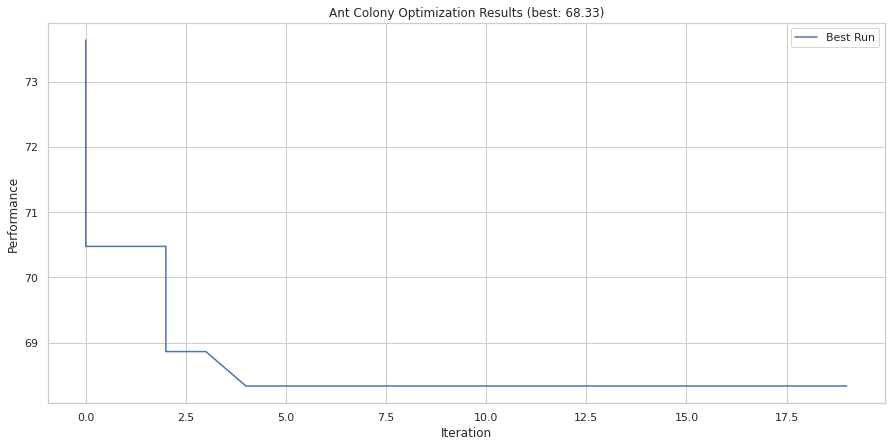

gen: 19,cost: 68.3343084095768, path: [1632, 1326, 1374, 1266, 1265, 1264, 1263, 1262, 1261, 838, 1394, 1633, 1111, 301, 664, 766, 572, 1061, 419, 1167, 334, 186, 388, 1079, 663, 391, 977, 984, 295, 589, 719, 280, 1177, 385, 1415, 1593, 743, 816, 582, 826, 437, 786, 470, 787, 1213, 326, 1527, 455, 1296, 1417, 1404, 591, 985, 868, 833, 1096, 1151, 33, 1101, 32, 858, 1558, 920, 654, 1205, 477, 1229, 655, 613, 1132, 863, 943, 953, 142, 521, 1095, 1271, 682, 683, 365, 1362, 1537, 127, 1588, 1368, 1180, 435, 764, 815, 628, 843, 397, 714, 545, 791, 903, 495, 1011, 875, 1214, 1521, 911, 888, 454, 713, 1012, 859, 404, 876, 715, 524, 1294, 398, 770, 1474, 895, 157, 1129, 488, 933, 547, 1041, 696, 12, 612, 1252, 450, 426, 445, 425, 384, 605, 564, 874, 762, 880, 782, 860, 361, 158, 375, 1304, 1221, 1380, 282, 1220, 607, 1317, 1030, 1505, 1344, 100, 1323, 614, 1300, 1029, 283, 1423, 1634, 1150, 1014, 795, 847, 1318, 1327, 1624, 1638, 759, 861, 561, 821, 571, 925, 994, 1073, 898, 717, 620, 578, 862

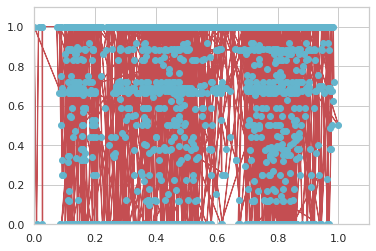

In [ ]:
import math
#import re
#from aco import ACO, Graph
#from plot import plot


Result_Dict = {}
Result_DictPath ={}
 
#def remove(string):
#    pattern = re.compile(r'\s+')
#    return re.sub(pattern, '', string)
MuLOC = 3
#MuLvl = 5
#MuFOH = 4
#MuDeptt = 3

def Vol_f3(v):
  return 1/(v+0.1)

Mu_Volume = 0
def Euclidean(city1: dict, city2: dict):
    return math.sqrt((city1['X Value'] - city2['X Value']) ** 2 + (city1['Y Value'] - city2['Y Value']) ** 2 + (city1['Z value'] - city2['Z value']) ** 2 )  ## 
#def distance(city1: dict, city2: dict):
#     dist =math.sqrt((city1['X Value'] - city2['X Value']) ** 2 + (city1['Y Value'] - city2['Y Value']) ** 2 + (city1['Z value'] - city2['Z value']) ** 2 )  + Mu_Volume * Vol_f3(city2['Volume'])
#    return dist 
#def distance(city1: dict, city2: dict):
#    dist = MuLOC*Euclidean(city1['x'],city2['x'], city1['y'] , city2['y']) + MuLvl*lvl_f(city1['Level'],city2['Level']) + MuFOH * FoH_f1(city2['FOH']) + MuDeptt*Dep_f2(city1['Department'],city2['Department']) + MuVolume * Vol_f3(city2['Volume'])
#    return dist 




def main():
    cities = []
    points = []
    #example1 = "/content/sample_data/room.txt"
    #with open(example1) as f:
        #for line in f.readlines():
            #city = line.split('    ')
            #cities.append(dict(index=int(city[0]), x=float(city[1]), y=int(city[2])))
            #points.append((int(city[1]), int(city[2])))
    cities=df_dict
    points=df_dict_points
    #return cities
    cost_matrix = []
    rank = len(cities)
    for i in range(rank):
        row = []
        for j in range(rank):
            row.append(Euclidean(cities[i], cities[j]))
        cost_matrix.append(row)
    aco = ACO(10, 20, 5.0, 10.0, 0.5, 10, 2)
    graph = Graph(cost_matrix, rank)
    gen,path,cost = aco.solve(graph)
    print('gen: {},cost: {}, path: {}'.format(gen,path,cost))
    #Result_Dict[num + gen] = (cost)
    #Result_DictPath[gen] = (path)

    
    plot(points, cost)
      
if __name__ == '__main__':
    main()

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

In [ ]:
Result_Dict.keys()

In [ ]:
Result_Dict.values()

In [ ]:
df.iloc[141]

In [ ]:
df.index[df['Element ID']==50419626].tolist()